# VTA Mini-Challenge 1 - Aufgabe 1

**Authors:** Ivan Halka, Gökçe Yaren Demir



## Step 1 
### Download Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2
### Load Dataset and Check Suitability for Linear Regression

In [15]:
# Load dataset
df = pd.read_csv("data/data_a1_mc1_vta_hs25.csv", sep=";")

# Extract x and y values
x = df.iloc[:, 0].to_numpy(dtype=float)
y = df.iloc[:, 1].to_numpy(dtype=float)
N = len(x)

print(f"Number of observations: {N}")
df.head()


Number of observations: 101


,x,y
0,0,-2.000
1,1,-1.595
2,2,-1.302
3,3,-1.103
4,4,-1.520


We used a **scatter plot** to visualize the relationship between \( x \) and \( y \).  
By looking at the plot, we can see that the points form a clear **straight-line pattern**.  
This indicates a **strong linear relationship** between the variables, showing that the dataset is **suitable for linear regression**.


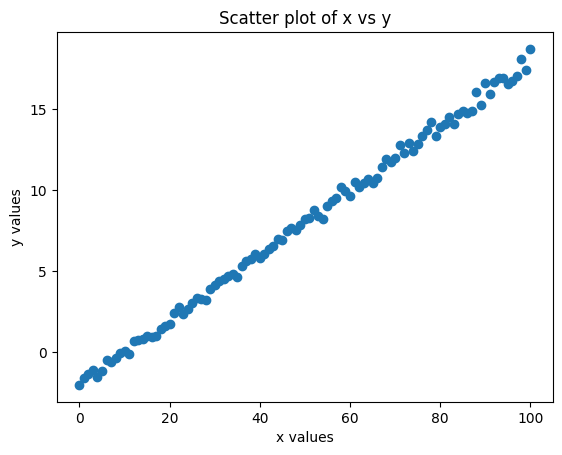

In [26]:
plt.scatter(x, y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Scatter plot of x vs y")
plt.show()

## Step 3
### Check if Standardization is Needed
Before starting the **Gradient Descent (GD)** optimization, we first examined the scale of the input variable \( x \).  
To decide whether **standardization** is necessary, we computed the **mean** and **standard deviation** of \( x \):


In [ ]:
xm, xs = x.mean(), x.std()
xs = xs if xs != 0 else 1.0  # prevent division by zero

print("x mean:", xm)
print("x std deviation:", xs)

x mean: 50.0
x std deviation: 29.154759474226502


**Gradient Descent (GD)** works better when the data isn’t too big or too small.  
So, we **standardized** \( x \) — basically, we **centered** it and **scaled** it — to make the updates stable and avoid wild oscillations.


In [24]:
x_s = (x - xm) / xs

## Step 4
### Gradient Descent Optimization Loop


In this step, the **learning process** of the model begins.  

First, the parameters \( w_0 \), \( w_1 \), and the **learning rate** \( \mu \) are initialized.  
The number of **epochs** is set to 50, meaning that the algorithm will pass through the dataset 50 times.  
Starting the model from zero (i.e., \( w_0 = 0 \), \( w_1 = 0 \)) is sufficient for a simple dataset.  

For each data point, the model computes its **current prediction** \( \hat{y} \).  
The difference between the true value \( y \) and the predicted value \( \hat{y} \) is then used to calculate the **Mean Squared Error (MSE)**, which indicates how well or poorly the model performs at that point.  

Next, the **gradients** (partial derivatives of the loss function) are computed based on these errors.  
The gradients show the direction in which the error decreases most rapidly.  
Using this information, the parameters \( w_0 \) and \( w_1 \) are updated — allowing the model to iteratively move toward **minimizing the overall error**.  

Additionally, every 10 epochs, the current **MSE**, as well as the updated values of \( w_0 \) and \( w_1 \), are printed on the screen.  
This makes it possible to **monitor the learning progress** and see whether the predictions are improving over time.


In [18]:
# Initialize parameters
w0, w1 = 0.0, 0.0           # intercept (b) and slope (m) for standardized x
mu = 0.1                     # learning rate
epochs = 50

for ep in range(1, epochs + 1):
    y_hat = w1 * x_s + w0
    err = y - y_hat
    mse = np.mean(err**2)

    # Gradients (with respect to MSE)
    dw0 = -(2.0 / N) * np.sum(err)
    dw1 = -(2.0 / N) * np.sum(x_s * err)

    # Update weights
    w0 -= mu * dw0
    w1 -= mu * dw1

    # Print progress for selected epochs
    if ep in (1, 10, 20, 30, 40, 50):
        print(f"Epoch {ep:>2d} | MSE={mse:.6f} | w0={w0:.6f} | w1={w1:.6f}")


Epoch  1 | MSE=97.823957 | w0=1.600945 | w1=1.160377
Epoch 10 | MSE=1.847181 | w0=7.145222 | w1=5.178912
Epoch 20 | MSE=0.106799 | w0=7.912435 | w1=5.734994
Epoch 30 | MSE=0.086734 | w0=7.994813 | w1=5.794703
Epoch 40 | MSE=0.086502 | w0=8.003659 | w1=5.801114
Epoch 50 | MSE=0.086500 | w0=8.004609 | w1=5.801802


Each epoch represents one full learning cycle over the dataset.
As the epochs increase, the model’s error (MSE) decreases.
Once the MSE and parameter values (w₀, w₁) stop changing, it means the model has converged — it found the best-fitting line.

## Step 5
### Convert Results Back to the Original Scale
After training the model with **standardized data**, we converted the parameters back to the **original scale**.  
This step ensures that the **slope** and **intercept** can be interpreted using the real \( x \) values (not the standardized ones).


In [19]:
# Convert from standardized scale back to original scale
m_gd = w1 / xs
b_gd = w0 - m_gd * xm

print("\nGradient Descent (original scale):")
print("Slope (m) =", m_gd)
print("Intercept (b) =", b_gd)


Gradient Descent (original scale):
Slope (m) = 0.1990001766239573
Intercept (b) = -1.9454003061417104


## Step 6 
### Analytical (Closed-form) Solution

In this step, the **linear regression parameters** were calculated directly using **NumPy**, based on the **Ordinary Least Squares (OLS)** formula.  
Unlike **Gradient Descent**, which finds the minimum iteratively, this analytical approach computes the optimal **slope** and **intercept** in a single step using:

\[
m^* = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}, \quad
b^* = \bar{y} - m^* \bar{x}
\]


In [20]:
# Closed-form (Ordinary Least Squares) solution
x_mean, y_mean = x.mean(), y.mean()

m_star = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b_star = y_mean - m_star * x_mean

print("Analytical solution:")
print("Slope (m*) =", m_star)
print("Intercept (b*) =", b_star)

Analytical solution:
Slope (m*) = 0.19900301688992428
Intercept (b*) = -1.945428072218986


In [21]:
# Compare Mean Squared Errors (MSE)
mse_gd = np.mean((y - (m_gd * x + b_gd))**2)
mse_star = np.mean((y - (m_star * x + b_star))**2)

print(f"\nMSE (Gradient Descent): {mse_gd:.6f}")
print(f"MSE (Analytical)     : {mse_star:.6f}")



MSE (Gradient Descent): 0.086500
MSE (Analytical)     : 0.086500


Both methods — **Gradient Descent** and the **Analytical (OLS) solution** — led to the same **regression parameters** and identical **MSE**.  
This confirms that the Gradient Descent algorithm was **correctly implemented** and **converged to the global minimum**.  
The experiment demonstrates how **iterative optimization** and **analytical computation** reach the same result when applied to a **simple linear regression** problem.
